In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [2]:
renda = pd.read_csv('previsao.csv')

In [3]:
renda.drop(axis = 1, columns=['Unnamed: 0'], inplace=True)
renda.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'mau', 'renda'],
      dtype='object')

In [4]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   index                  15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12466 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  mau                    15000 non-null  bool   
 14  renda                  15000 non-null  float64
dtypes:

In [5]:
x = renda['renda']
y = renda.drop(axis=1, columns=['renda'])

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


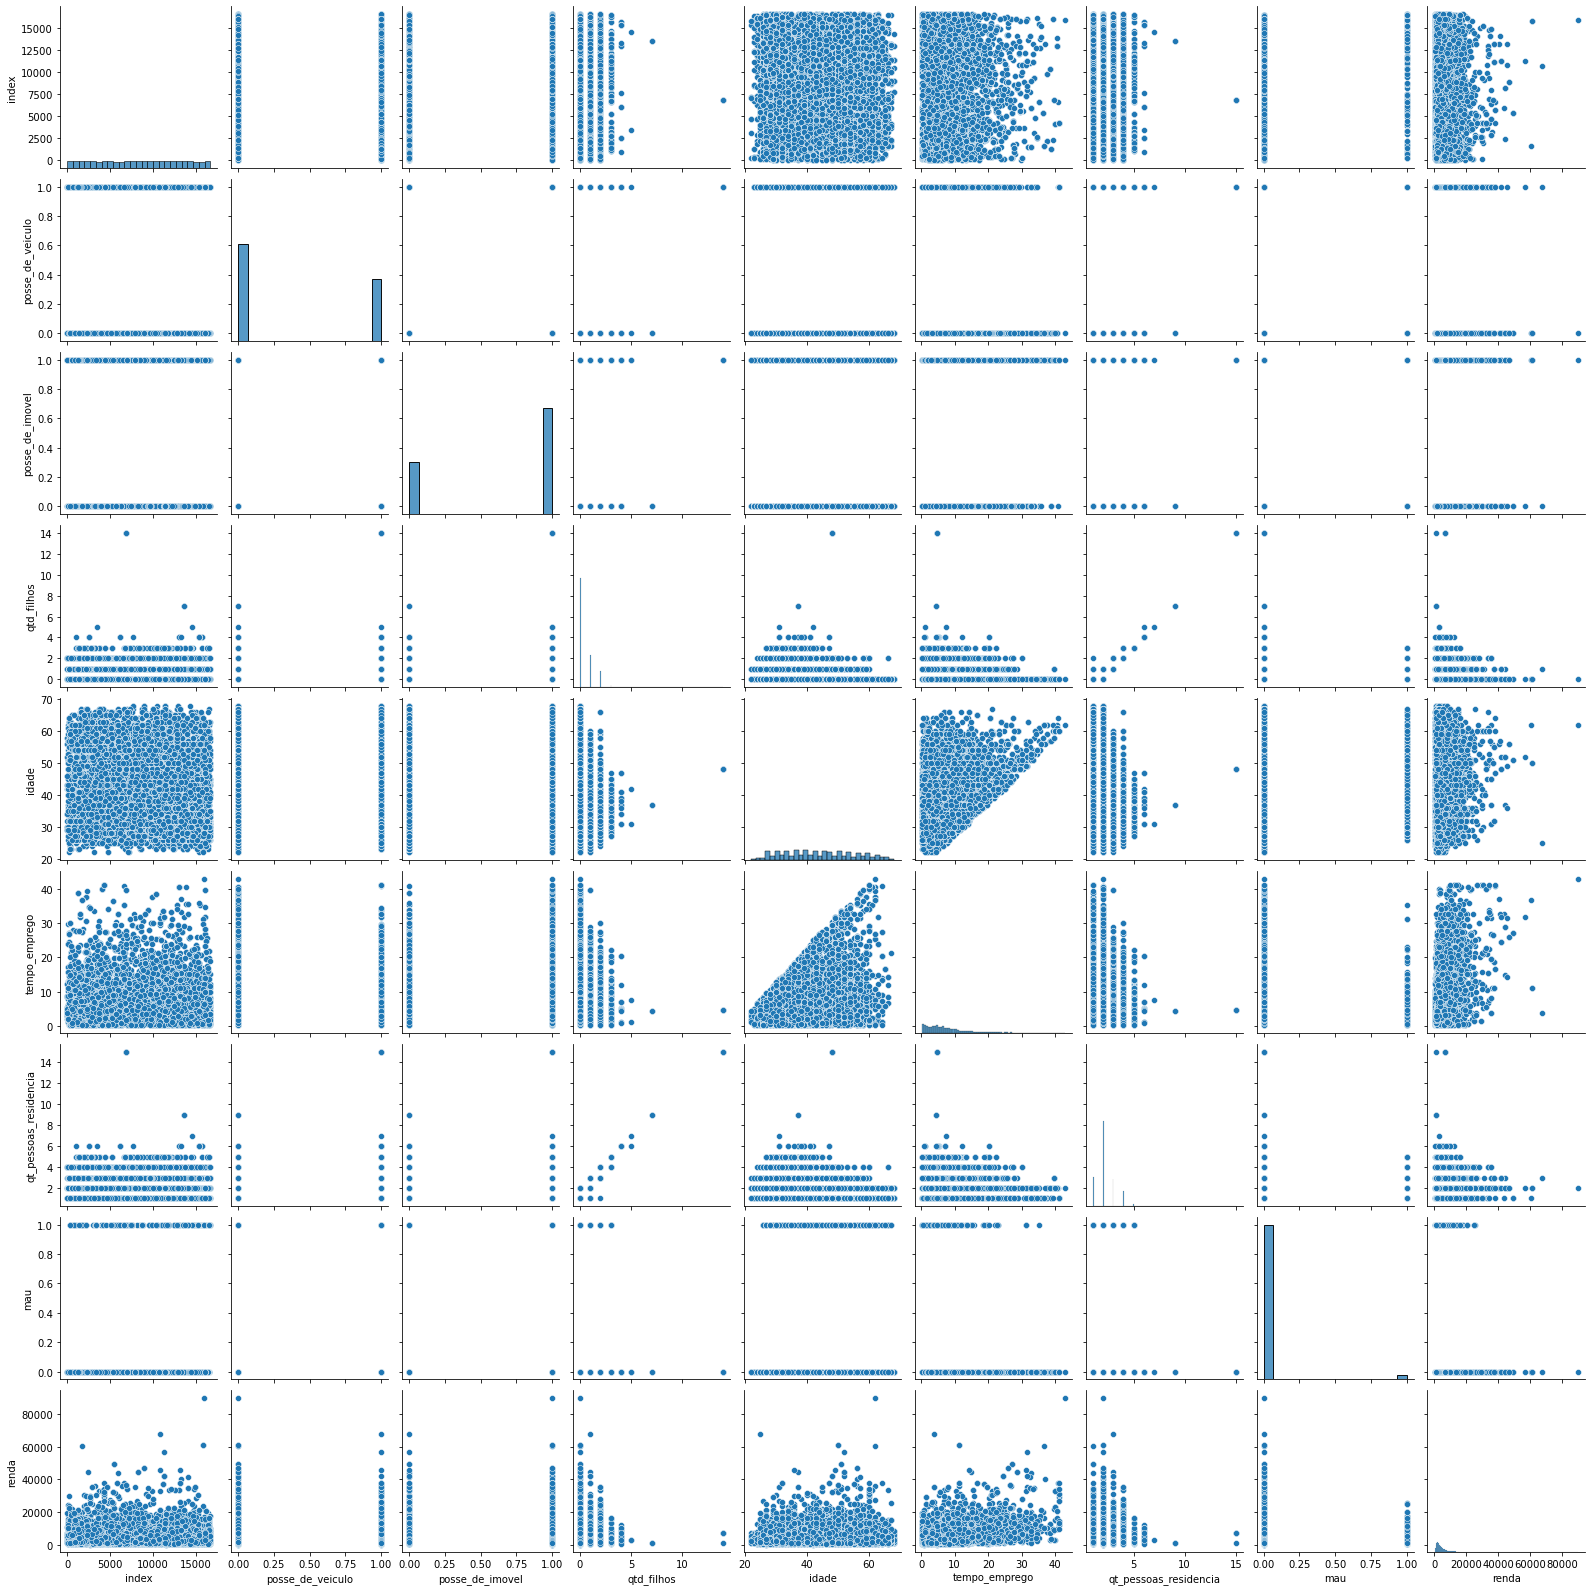

In [6]:
sns.pairplot(data = renda)
#renda1.corr()

In [7]:
# muitos dados, visualização fica complicada, utlizar o clustermap

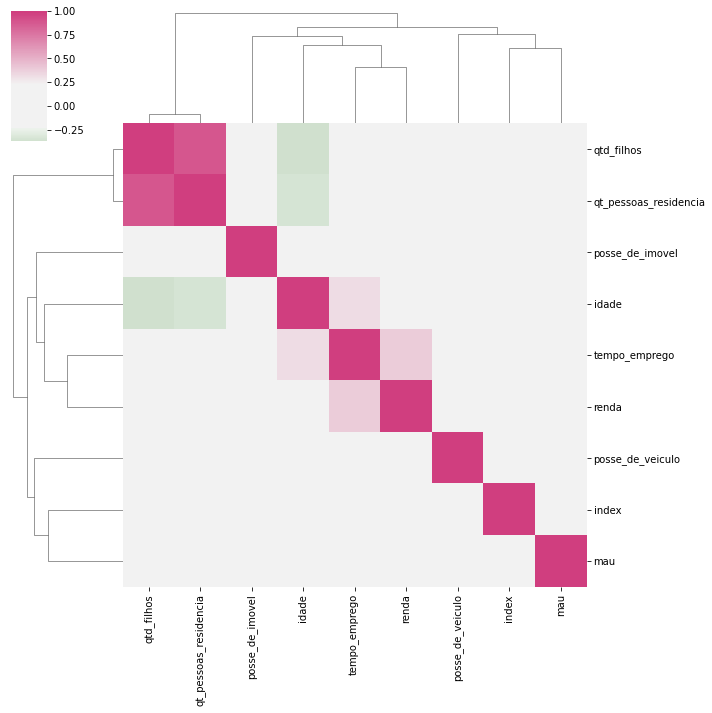

In [8]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(renda.corr(), figsize=(10, 10), center = 0, cmap=cmap)

In [10]:
renda.drop(axis=1, columns=['index','mau'], inplace=True)

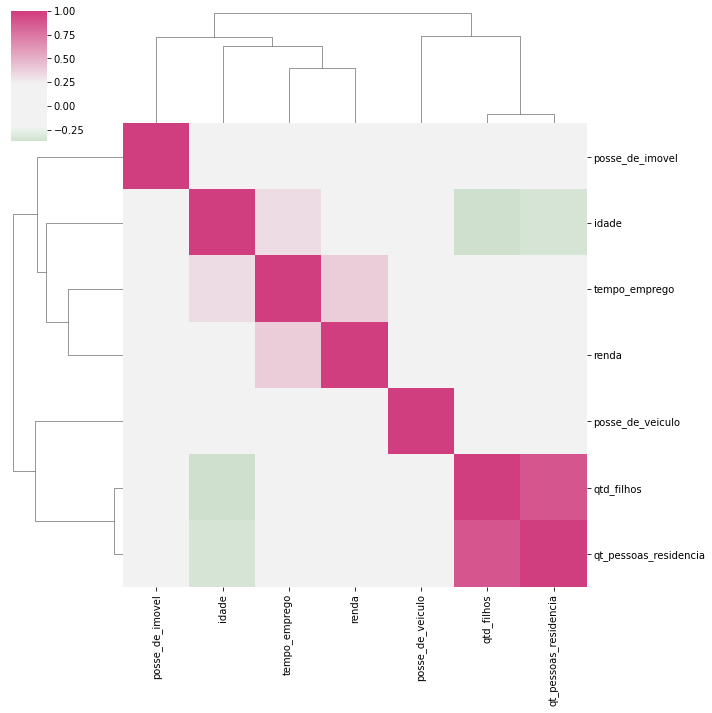

In [11]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(renda.corr(), figsize=(10, 10), center = 0, cmap=cmap)

In [12]:
# padrão interessante pode ser analisar as variáveis tempo_emprego X renda e  idade x tempo_emprego

In [13]:
x0 = renda['renda']
y0 = renda['tempo_emprego']

In [15]:
z0 = pd.DataFrame({'renda' : x0 , 't_emprego' : y0 })

,renda,t_emprego
renda,1.000000,0.394235
t_emprego,0.394235,1.000000


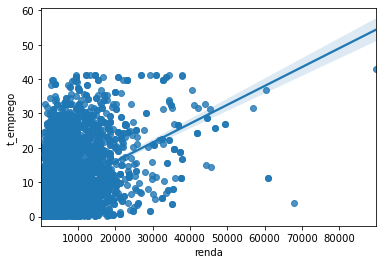

In [19]:
_ = sns.regplot(data = z0, x = 'renda' , y = 't_emprego')
z0.corr()

In [20]:
# verificamos que a váriavel tempo de emprego tem uma vida útil curta, poucas pessoas ultrapassam a faixa
# de 40 anos de emprego e temos poucos outliers na váriavel renda

In [21]:
x1 = renda['idade']
y1 = renda['tempo_emprego']
z1 = pd.DataFrame({'idade' : x1 , 't_emprego' : y1})

,idade,t_emprego
idade,1.000000,0.323934
t_emprego,0.323934,1.000000


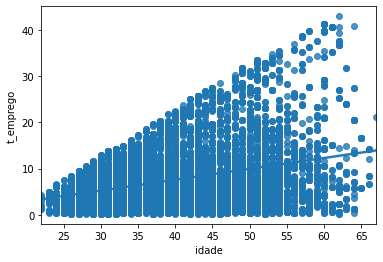

In [24]:
_ = sns.regplot(data = z1 , x = 'idade' , y = 't_emprego')
z1.corr()

In [25]:
# relação interessante, quanto maior a idade, mais os ponstos vão se afastando, a correlação vai
#dimunindo, pouco a pouco em relação ao tempo

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

Uma já foi avaliada acima, t_emprego com renda

In [ ]:
# qtd_pessoas_residencia x renda

In [30]:
x2 = renda['renda']
y2 = renda['qt_pessoas_residencia']
z2 = pd.DataFrame({'renda' : x2 , 'residencia' : y1})

,renda,residencia
renda,1.000000,0.394235
residencia,0.394235,1.000000


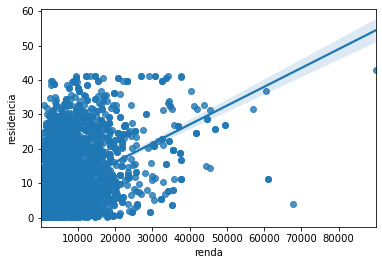

In [31]:
_ = sns.regplot(data = z2 , x = 'renda' , y = 'residencia')
z2.corr()

In [32]:
# padrão interessante, com poucos outliers , porém ainda bem concentrado na base, uma coisa que da para 
# afirmar seria que o padrão de renda é bem definido, proximo um do outro. por isso, poucos outliers
# poucas rendas se destacam (no caso, para maior)

0        3.0
1        2.0
2        4.0
3        2.0
4        2.0
        ... 
14995    3.0
14996    3.0
14997    2.0
14998    2.0
14999    2.0
Name: qt_pessoas_residencia, Length: 15000, dtype: float64

3) Na su aopinião, há outliers na variável renda?

Sim, como explicado nos In[20] e In[32]

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [33]:
a = np.log(renda['renda'])

In [34]:
a

0        8.122442
1        8.715411
2        8.640999
3        8.888300
4        8.298383
           ...   
14995    7.084469
14996    7.831689
14997    7.369506
14998    8.850144
14999    6.901596
Name: renda, Length: 15000, dtype: float64

In [43]:
x3 = a
y3 = renda['tempo_emprego']
z3 = pd.DataFrame({'renda' : x3 , 't_emprego' : y3})

              renda  t_emprego
renda      1.000000   0.379556
t_emprego  0.379556   1.000000
              renda  t_emprego
renda      1.000000   0.394235
t_emprego  0.394235   1.000000


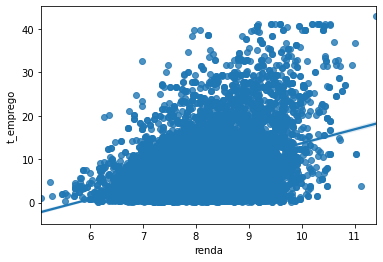

In [44]:
_ = sns.regplot(data = z3 , x = 'renda' , y = 't_emprego')
print(z3.corr())
print(z0.corr())

In [42]:
#A correlação, como mostra a matriz de dispersão, ela piorou

In [46]:
x4 = a
y4 = renda['qt_pessoas_residencia']
z4 = pd.DataFrame({'renda' : x4 , 'residencia' : y4})

               renda  residencia
renda       1.000000    0.036267
residencia  0.036267    1.000000
               renda  residencia
renda       1.000000    0.394235
residencia  0.394235    1.000000


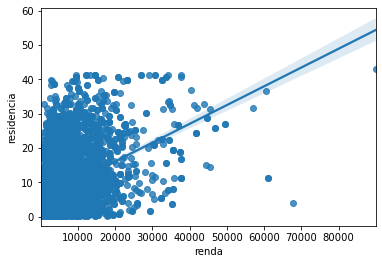

In [47]:
_ = sns.regplot(data = z2 , x = 'renda' , y = 'residencia')
print(z4.corr())
print(z2.corr())

In [ ]:
#A correlação, como mostra a matriz de dispersão, ela piorou

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Piorou, de acordo com a matriz de dispersão